# In-Vertex and Out-of-Vertex distribution comparison

In this notebook we briefly compare the human normative ratings of the SMID images captioned by Vertex and those that were not.

Below is a code chunk that allows you to pop-out all graphs and visuals produced in this notebook. It will making viewing some graphs in this notebook significantly easier, as otherwise, the text for these graphs may not fit nicely.

Below that is another code chunk that reverts this.

In [6]:
# Run to make the plots pop out of the .ipynb file
%matplotlib qt

In [ ]:
# Run to make the plots stay in the .ipynb file
%matplotlib inline 

## Imports and Setting-up

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy import stats as sp

In [2]:
# Read the csv files
norms_df = pd.read_csv("./Data/SMID_norms.csv")
# Rename columns accordingly
norms_df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
# We need to resort the IDs due to how the caption image train-test splits were done
# We wish to use the same splits, so this must be done
norms_df = norms_df.sort_values(by=['ID'])

# Get the norms matrix (for our predicted variables)
col_names = ["valence_mean", "arousal_mean", 
             "moral_mean", "authority_mean",
             "fairness_mean", "harm_mean",
             "ingroup_mean", "purity_mean"]
Y = norms_df[col_names].to_numpy()

In [3]:
# Google Captions

# Get the Vertex IDs and make a mask
with open('./Data/SMIDVertex.pickle', 'rb') as handle:
    Vertex_dict = pickle.load(handle)
Vertex_df = pd.DataFrame({'ID':Vertex_dict.keys(), 'caption':Vertex_dict.values()})
Vertex_df = Vertex_df.drop(Vertex_df[Vertex_df['caption'].str.len()==0].index)
Vertex_df = Vertex_df.sort_values(by=['ID'])
Vertex_df['ID']=Vertex_df['ID'].str.split('.')
Vertex_df['ID']=Vertex_df['ID'].str[0]
Vertex_df['caption']=Vertex_df['caption'].str[0]
# Get the Vertex IDs and make a mask
Vertex_IDs = list(Vertex_df['ID'])
subset_mask = norms_df['ID'].isin(Vertex_IDs)

## Visualization

Below is the density and counts version of the histogram of ratings for images that were captioned by Vertex AI and those that were not.

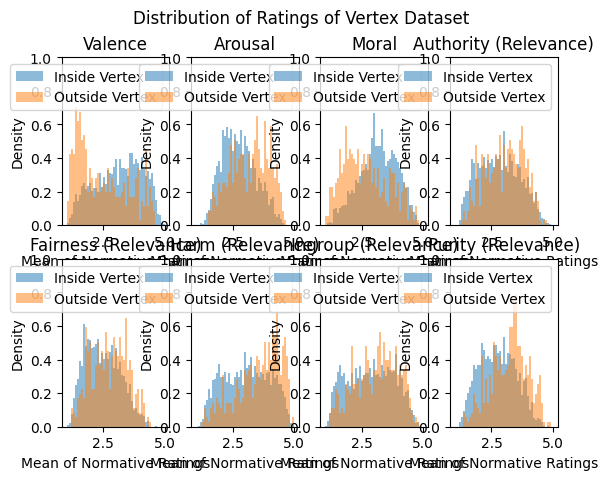

In [4]:
fig, axs = plt.subplots(2, 4)
col_names = ["valence_mean", "arousal_mean", 
             "moral_mean", "authority_mean",
             "fairness_mean", "harm_mean",
             "ingroup_mean", "purity_mean"]
plt_names = ["Valence", "Arousal", 
             "Moral", "Authority (Relevance)",
             "Fairness (Relevance)", "Harm (Relevance)",
             "Ingroup (Relevance)", "Purity (Relevance)"]
InVertex = norms_df['ID'].isin(Vertex_IDs)

for i in range(8):
    # Get the values
    inside = norms_df[InVertex][col_names[i]]
    outside = norms_df[~InVertex][col_names[i]]
    #all_norms = norms_df[col_names[i]]

    # Plot the distributions
    axs[i//4, i%4].hist(inside, np.linspace(1, 5, 50), alpha=0.5, label='Inside Vertex', density=True)
    axs[i//4, i%4].hist(outside, np.linspace(1, 5, 50), alpha=0.5, label='Outside Vertex', density=True)

    axs[i//4, i%4].set_ylim(0,1)
    axs[i//4, i%4].set_xlabel("Mean of Normative Ratings")
    axs[i//4, i%4].set_ylabel('Density')
    axs[i//4, i%4].set_title(plt_names[i])
    axs[i//4, i%4].legend(loc='upper right')

fig.suptitle("Distribution of Ratings of Vertex Dataset")
plt.show()

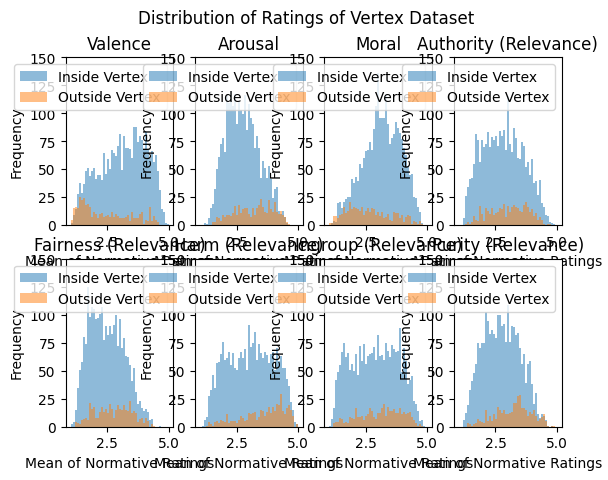

In [5]:
fig, axs = plt.subplots(2, 4)
col_names = ["valence_mean", "arousal_mean", 
             "moral_mean", "authority_mean",
             "fairness_mean", "harm_mean",
             "ingroup_mean", "purity_mean"]
plt_names = ["Valence", "Arousal", 
             "Moral", "Authority (Relevance)",
             "Fairness (Relevance)", "Harm (Relevance)",
             "Ingroup (Relevance)", "Purity (Relevance)"]
InVertex = norms_df['ID'].isin(Vertex_IDs)

for i in range(8):
    # Get the values
    inside = norms_df[InVertex][col_names[i]]
    outside = norms_df[~InVertex][col_names[i]]
    #all_norms = norms_df[col_names[i]]

    # Plot the distributions
    axs[i//4, i%4].hist(inside, np.linspace(1, 5, 50), alpha=0.5, label='Inside Vertex')
    axs[i//4, i%4].hist(outside, np.linspace(1, 5, 50), alpha=0.5, label='Outside Vertex')
    
    axs[i//4, i%4].set_ylim(0,150)
    axs[i//4, i%4].set_xlabel("Mean of Normative Ratings")
    axs[i//4, i%4].set_ylabel('Frequency')
    axs[i//4, i%4].set_title(plt_names[i])
    axs[i//4, i%4].legend(loc='upper right')

fig.suptitle("Distribution of Ratings of Vertex Dataset")
plt.show()

## Statistical Testing

The two-sample Kolmogorov-Smirnov test on the normative ratings for the images captioned by Vertex AI and those that were not is below.

In [44]:
ratings = Y

var_names = ["Valence", "Arousal", 
            "Moral", "Authority (Relevance)",
            "Fairness (Relevance)", "Harm (Relevance)",
            "Ingroup (Relevance)", "Purity (Relevance)"]
for i in range(len(var_names)):
    In_Vertex = ratings[subset_mask][:,i]
    Out_Vertex = ratings[~subset_mask][:,i]
    test_statistic, p_value = sp.kstest(Out_Vertex, In_Vertex)
    print("[{}:] Test-statistic: {} | P-Value: {}".format(var_names[i], test_statistic, p_value))

[Valence:] Test-statistic: 0.3071891827430259 | P-Value: 1.7962169828420587e-31
[Arousal:] Test-statistic: 0.27691333902083276 | P-Value: 1.431743812631601e-25
[Moral:] Test-statistic: 0.29361348854702735 | P-Value: 9.591037874366281e-29
[Authority (Relevance):] Test-statistic: 0.1232215097558962 | P-Value: 2.2952698464653987e-05
[Fairness (Relevance):] Test-statistic: 0.16166808854152334 | P-Value: 6.241501352875828e-09
[Harm (Relevance):] Test-statistic: 0.25685848217152396 | P-Value: 5.100399804784012e-22
[Ingroup (Relevance):] Test-statistic: 0.11728999825705663 | P-Value: 6.668931258460879e-05
[Purity (Relevance):] Test-statistic: 0.2751098512994101 | P-Value: 3.0688835450005357e-25
